<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de la transformada inversa**

Para realizar este metodo utilizaremos la siguiente función:

$f(x)=2 x e^{-x^2}$

Iniciamos importando las librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Proporcionamos nuestra funcion de distribucion de probabilidad

In [4]:
#Función de densidad de probabilidad
def fdp(x):
    return 2 * x * np.exp(-x**2)

Para éste método necesitamos obtener la funcion de distribucion acumulada, realizando manualmente los calculos necesarios llegamos a que la función de distribucion acumulada es

$F(X)= 1-e^{x^2}$

Entonces podemos definirla dentro de una función:

In [5]:
# Función de distribución acumulativa
def fdc(x):
    return 1 - np.exp(-x**2)

Una vez que hemos obtenido la función de distribucion acumulada debemos hallar la inversa de la misma

In [6]:
# Función inversa de la función de distribución acumulativa
def inversa (u):
    return np.sqrt(-np.log(1 - u))

Como

$X=F^{-1}(U)$

Apartir de la funcion inversa de la función de distribución acumulada podemos generar las muestras a traves del método de la transformada inversa

In [24]:
# Generar muestras
def transformada_inversa(n_muestras):
    u =np.random.rand(n_muestras)
    return inversa(u)


muestras = transformada_inversa(1000)

Obtenemos la funcion de distribución acumulativa y la funcion de densidad

In [22]:
# Calcular la funcion de distribucion acumulada
def fdc(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Generar datos para la funcion de distribucion acumulada
x_fdc, y_fdc = fdc(muestras)

# Generar datos para la funcion de densidad
x = np.linspace(0, 3, 400)
y_fdp = fdp(x)


Finalmente realizamos las graficas para poder visualizar la funcion de densidad de probabilidad, la funcion de distribucion acumulativa y el histograma de las muestras

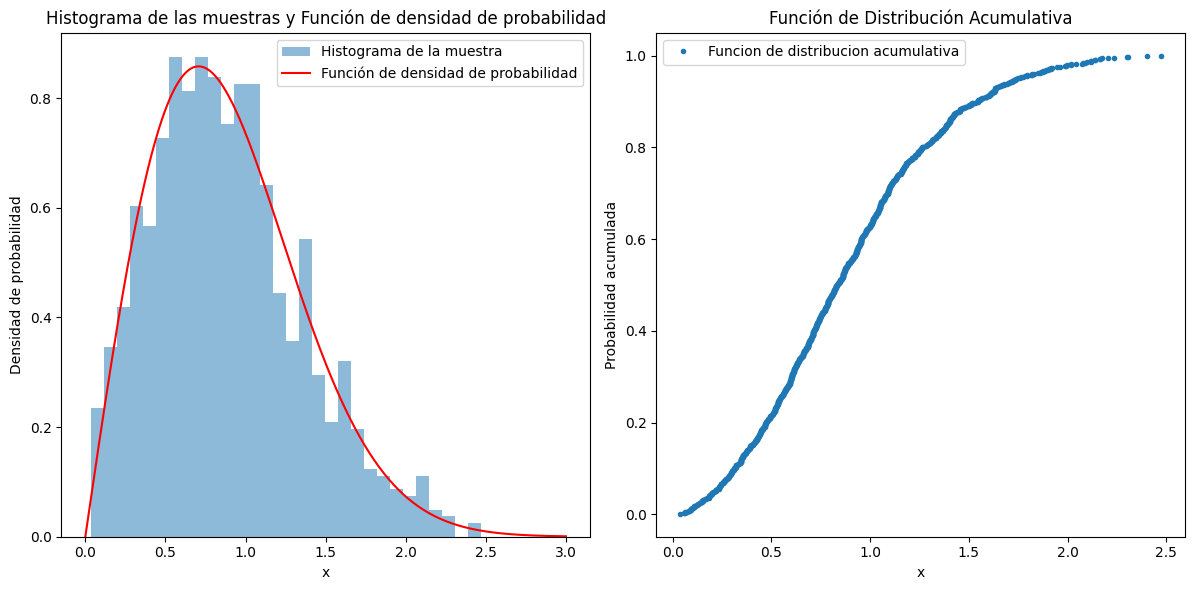

In [23]:
# Graficar el histograma de las muestras, la función de densidad de probabilidad y la funcion de distribucion acumulativa
plt.figure(figsize=(18, 6))

# Grafica para el Histograma de las muestras y Función de densidad de probabilidad
plt.subplot(1, 3, 1)
plt.hist(muestras, bins=30, density=True, alpha=0.5, label='Histograma de la muestra')
plt.plot(x, y_fdp, 'r-', label='Función de densidad de probabilidad')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Histograma de las muestras y Función de densidad de probabilidad')

# Grafica para la Función de distribución acumulativa
plt.subplot(1, 3, 2)
plt.plot(x_fdc, y_fdc, marker='.', linestyle='none', label='Funcion de distribucion acumulativa')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.title('Función de Distribución Acumulativa')

plt.tight_layout()
plt.show()
